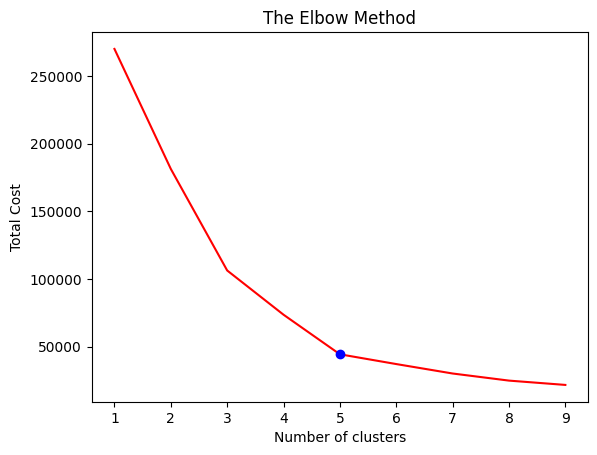

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

warnings.filterwarnings('ignore')

#Importing the dataset with pandas

dataset = pd.read_csv('clusterdata.csv')
X = dataset.iloc[:,[3,4]].values

# Using the Elbow method to find the optimal number of clusters

wcss =[]
for i in range (1,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)    # calculating cost for different number of clusterings

# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,10),wcss,c="red")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Total Cost')
plt.plot(5,wcss[4],'ro',c="blue")
plt.show()


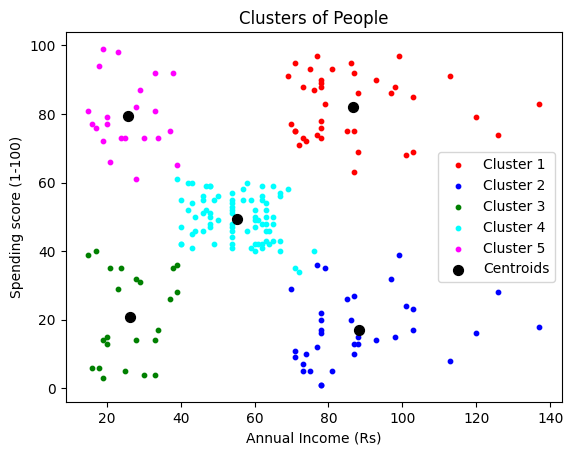

In [ ]:
# Applying KMeans to the dataset with the optimal number of cluster

kmeans=KMeans(n_clusters= 5)
Y_Kmeans = kmeans.fit_predict(X)

# Visualising the clusters

plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 10, c='red', label = 'Cluster 1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 10, c='blue', label = 'Cluster 2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 10, c='green', label = 'Cluster 3')

plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3,1],s = 10, c='cyan', label = 'Cluster 4')

plt.scatter(X[Y_Kmeans == 4, 0], X[Y_Kmeans == 4,1],s = 10, c='magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')

plt.title('Clusters of People')
plt.xlabel('Annual Income (Rs)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008


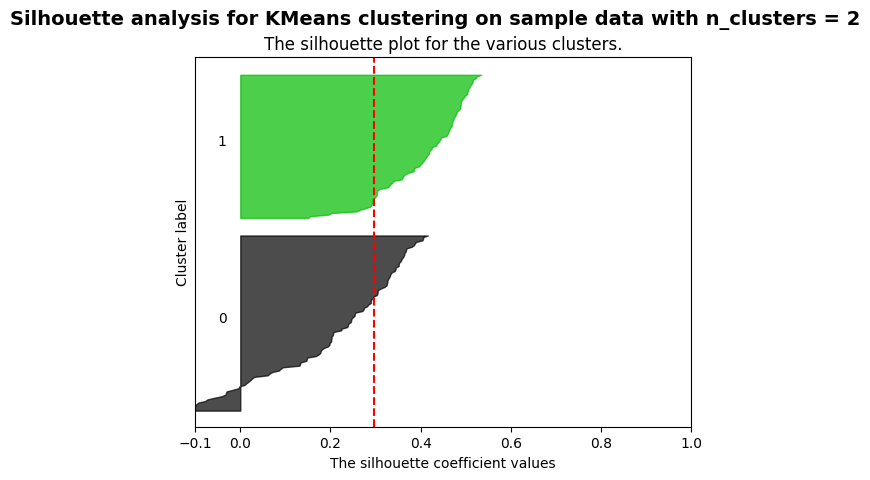

For n_clusters = 3 The average silhouette_score is : 0.46761358158775435


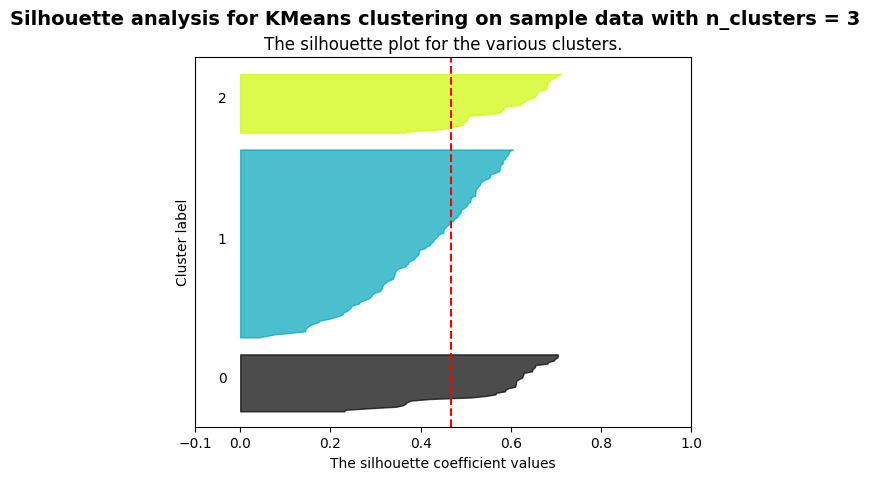

For n_clusters = 4 The average silhouette_score is : 0.4931963109249047


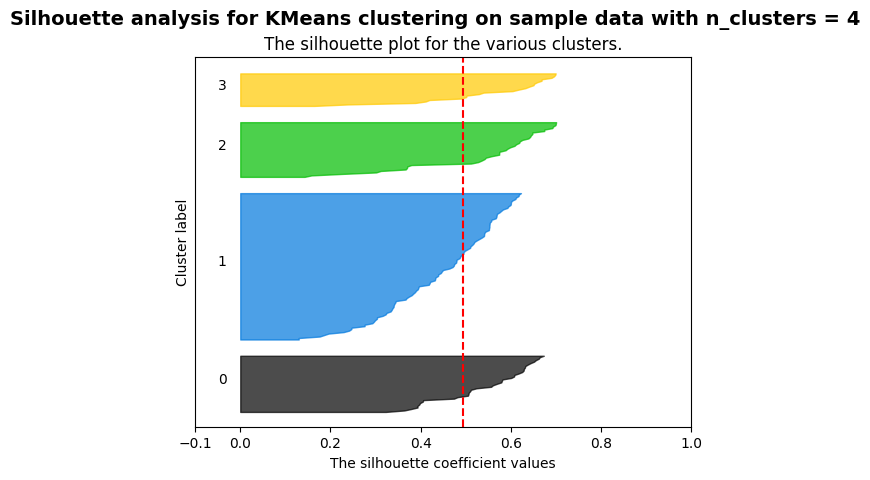

For n_clusters = 5 The average silhouette_score is : 0.553931997444648


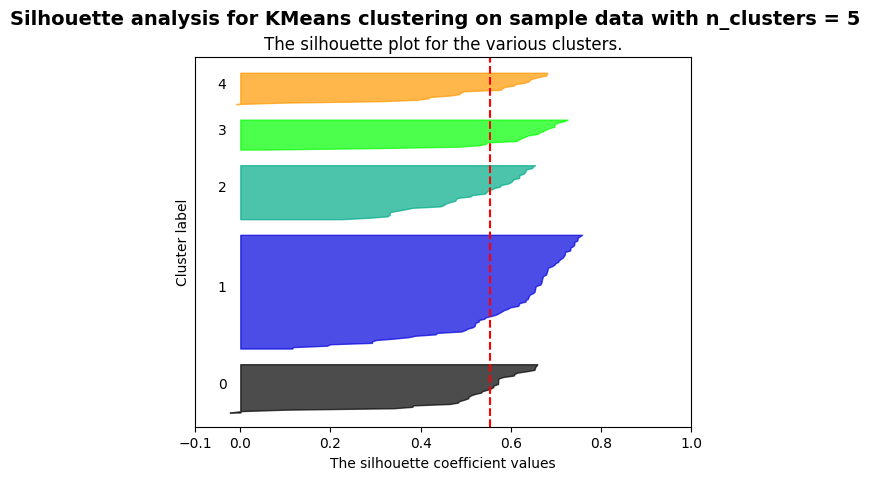

For n_clusters = 6 The average silhouette_score is : 0.5379675585622219


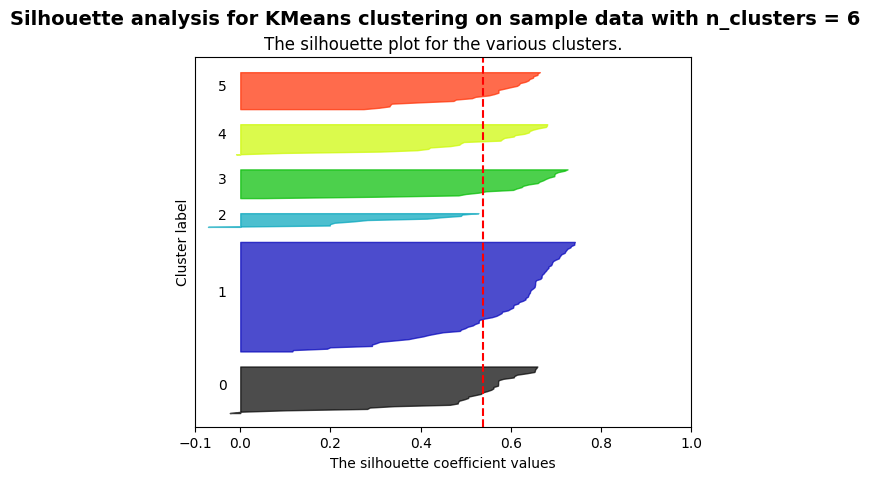

For n_clusters = 7 The average silhouette_score is : 0.5264283703685728


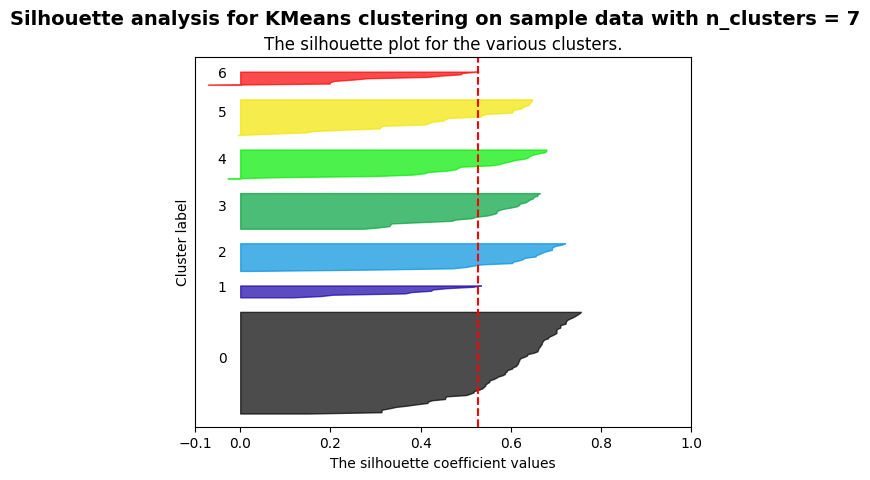

For n_clusters = 8 The average silhouette_score is : 0.45704384633565154


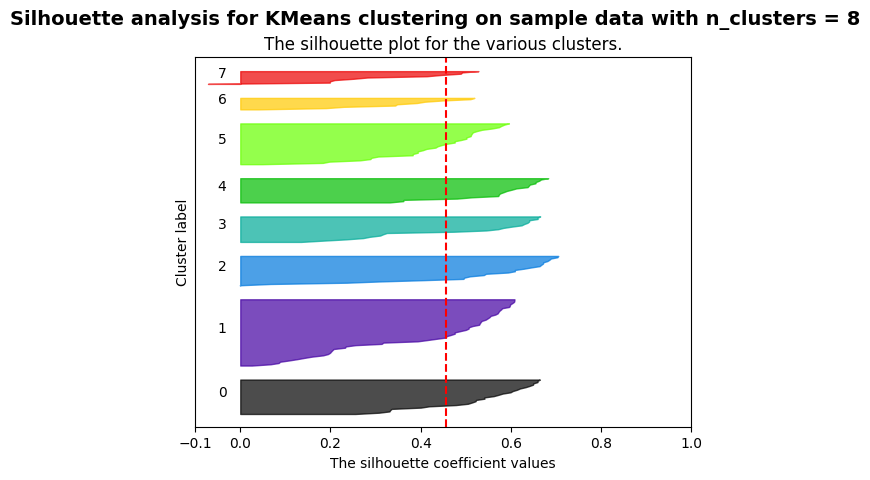

For n_clusters = 9 The average silhouette_score is : 0.4563032021725485


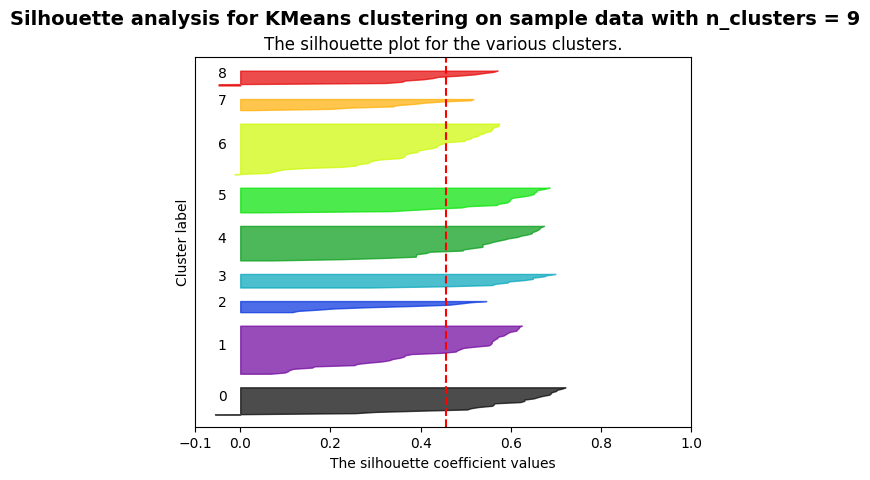

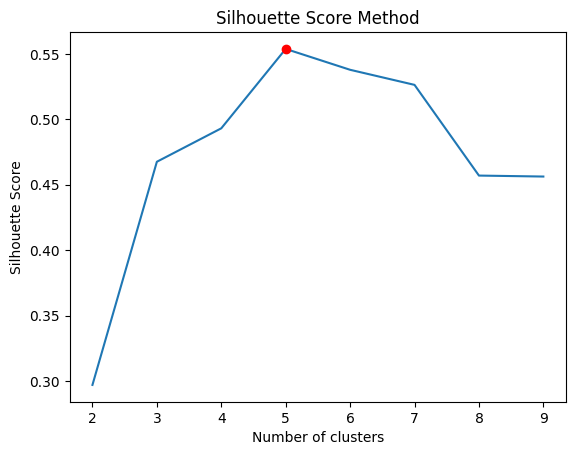

In [ ]:
# Silhouette Score Method
seed = 0
dict_silhouette_avg = dict()
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    fig, ax = plt.subplots()
  
    ax.set_xlim([-0.1, 1])
    
    ax.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    
    estimator = KMeans(n_clusters = n_clusters,random_state=seed)
    cluster_labels = estimator.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X,cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    dict_silhouette_avg[n_clusters] = silhouette_avg
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X,cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10 

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
silhouette_df = pd.Series(dict_silhouette_avg)
ax = silhouette_df.plot(title = 'Silhouette Score Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
plt.plot(5,silhouette_df[5],'ro')